In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Zad 1

In [25]:
def generate_matrix(n):
    return np.random.uniform(0, 1000, (n, n))

def compare_matrices(m1, m2, eps=pow(10, -6)):
    try:
        assert np.linalg.norm(np.abs(m1) - np.abs(m2)) < eps
    except AssertionError:
        raise AssertionError("Matrices are different")
    else:
        print("OK")

def gram_schmidt(matrix):
    n = matrix.shape[0]
    q = np.zeros((n, n))
    r = np.zeros((n, n))
    q[0] = (matrix[:, 0] / np.linalg.norm(matrix[:, 0]))
    r[0, 0] = np.dot(q[0], matrix[:, 0])
    for i in range(1, n):
        q[i] = matrix[:, i]
        for j in range(i):
            val = np.dot(q[j], matrix[:, i])
            q[i] -= val*q[j]
            r[j, i] = val
        q[i] /= np.linalg.norm(q[i])
        r[i, i] = np.dot(q[i], matrix[:, i])

    return q.T, r

In [26]:
def test_qr():
    sizes = [10, 20, 50, 100, 200]
    for s in sizes:
       mat = generate_matrix(s)
       q, r = gram_schmidt(mat)
       q_lib, r_lib = np.linalg.qr(mat)
       compare_matrices(q, q_lib)
       compare_matrices(r, r_lib)

In [27]:
test_qr()

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


In [28]:
def random_orthonormal(n):
    mat = generate_matrix(n)
    return np.linalg.qr(mat)[0]

def random_diagonal(n, quotient):
    smallest = 100 / quotient
    return np.diag(np.linspace(100, smallest, n))

def random_matrix(n, quotient):
    u = random_orthonormal(n)
    v = random_orthonormal(n)
    s = random_diagonal(n, quotient)
    return u @ s @ v

In [29]:
def task3():
    vals = []
    for i in range(1, 50):
        mat = random_matrix(8, i)
        q, r = gram_schmidt(mat)
        vals.append(np.linalg.norm(np.identity(8) - q @ r))
    plt.plot(range(1, 50), vals)
    plt.show()


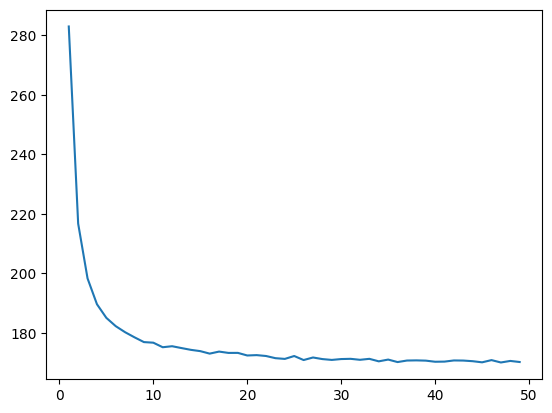

In [30]:
task3()

## Zad 2

In [48]:
points_x = np.array(range(-5, 6))
y = [2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4]

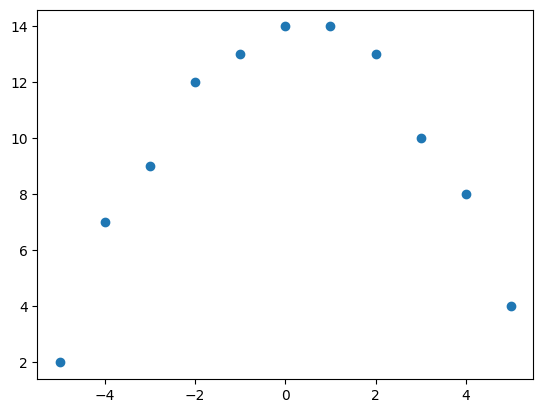

In [49]:
plt.scatter(points_x, y)
plt.show()

In [50]:
system = np.ones((len(points_x), 3))
system[:, 1] = points_x
system[:, 0] = points_x**2

In [51]:
from scipy.linalg import solve_triangular

Q, R = np.linalg.qr(system)
a, b, c = solve_triangular(R, Q.T @ y)

In [52]:
quadratic = lambda x: a*x**2 + b*x + c

In [53]:
mesh = np.linspace(-6, 6, 100)
values = np.vectorize(quadratic)(mesh)

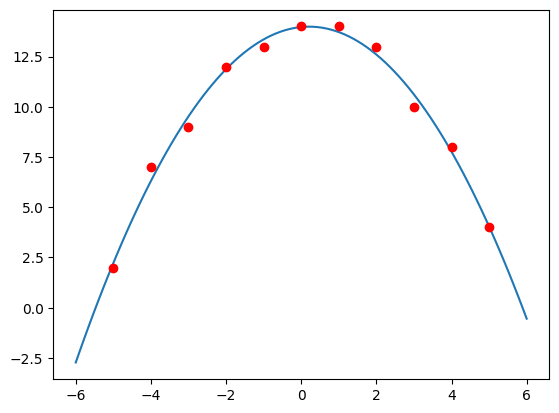

In [54]:
plt.plot(mesh, values)
plt.scatter(points_x, y, color='red', zorder=2)
plt.show()